In [1]:
# parameters
origin_cell = 'A549'
origin_tf = 'ETS1'
origin_binding = 'AGCCGGAAGTT'
origin_cpg = 3


In [2]:
import pandas as pd

# Load Peaks
df_peaks = pd.read_csv(f'data/{origin_cell}_{origin_tf}_peaks.bed', sep='\t', header=None)

origin_mehyl_plus = f'data/{origin_cell}_wgbs_cpg_plus.bigWig'
origin_mehyl_minus = f'data/{origin_cell}_wgbs_cpg_minus.bigWig'


In [3]:
df_peaks

,0,1,2,3,4,5,6,7,8,9
0,chr12,6852075,6852809,.,1000,.,638.31297,-1.0,4.02510,429
1,chr17,75784449,75784966,.,1000,.,539.69103,-1.0,4.02510,236
2,chr19,46850697,46851309,.,1000,.,531.03108,-1.0,4.02510,368
3,chr17,28952096,28952711,.,1000,.,519.70904,-1.0,4.02510,325
4,chr1,156740899,156741532,.,1000,.,499.60234,-1.0,4.02510,312
...,...,...,...,...,...,...,...,...,...,...
10084,chr9,129334341,129334845,.,1000,.,7.88030,-1.0,0.04121,252
10085,chr12,949742,950246,.,1000,.,7.87789,-1.0,0.04119,252
10086,chr11,65382487,65382991,.,628,.,7.87563,-1.0,0.04122,252
10087,chr1,15848938,15849442,.,542,.,7.85952,-1.0,0.04095,252


In [4]:
# This is GRH38, get the sequence

hg38_path = '/home/solozabal/Documents/github/build-deepsea-training-dataset/data_hg38/hg38.fa'

In [5]:
from pyfaidx import Fasta

# Get the sequence
hg38 = Fasta(hg38_path)

def get_sequence(row):
    chrom = row[0]
    start = row[1]
    end = row[2]

    sequence = str(hg38[chrom][start:end])
    sequence = sequence.upper()

    return sequence

df_peaks['sequence'] = df_peaks.apply(get_sequence, axis=1)

In [6]:
df_peaks

,0,1,2,3,4,5,6,7,8,9,sequence
0,chr12,6852075,6852809,.,1000,.,638.31297,-1.0,4.02510,429,GCGGCGCATGCCCCTAACGAGTGGCGCTCATTGGACGGGAGGGGCA...
1,chr17,75784449,75784966,.,1000,.,539.69103,-1.0,4.02510,236,TATGACACTGTTGGCAGTGAAATTATACTTGGAACTCTTTCGCAGA...
2,chr19,46850697,46851309,.,1000,.,531.03108,-1.0,4.02510,368,CCAGCCTCGGCTATTTACGCGTGGGCCCCCCCTCCGCCAGTCCCCG...
3,chr17,28952096,28952711,.,1000,.,519.70904,-1.0,4.02510,325,AAAATGACGCTTTTGGAGGCGTGTGGGATGACTGTGGTTCCTAATT...
4,chr1,156740899,156741532,.,1000,.,499.60234,-1.0,4.02510,312,TCGCCAAGGCCTAGCTGTCTTCAGCACCCACCCGCTCCAAACTTCC...
...,...,...,...,...,...,...,...,...,...,...,...
10084,chr9,129334341,129334845,.,1000,.,7.88030,-1.0,0.04121,252,TCTGCCTGGAAGGAGCGAAGGGGTTAAGTGTTTCTGGCGGCCTGGT...
10085,chr12,949742,950246,.,1000,.,7.87789,-1.0,0.04119,252,AGCGCCGGAGGGGGAAAAAAAAAAACACAGACCAGAGAAGGAACCG...
10086,chr11,65382487,65382991,.,628,.,7.87563,-1.0,0.04122,252,GGCCTGGCTGTTCTCTTCAGGGTTGTTTACGACTCCCCCGACTCCC...
10087,chr1,15848938,15849442,.,542,.,7.85952,-1.0,0.04095,252,AATCAAACGGTAAAACATTCCAAACCTTTTACGATGAGAAGATGTA...


In [7]:
# Filter for the Binding site AGCCGGAAGTT

df_peaks = df_peaks[df_peaks['sequence'].str.contains(origin_binding)]
df_peaks

,0,1,2,3,4,5,6,7,8,9,sequence
30,chr14,77457480,77458112,.,1000,.,380.92914,-1.0,4.02510,262,TGGGACACCCTCACCTCTTCCGCACAGAGCCCTCCCTCTCAGGACA...
353,chr15,34969629,34969964,.,1000,.,181.23464,-1.0,4.02510,166,CCACTCCAGTGGAAACTAAAGGACCGCTCTGGGCAGCGGCAACCCT...
473,chr14,77457480,77458112,.,1000,.,157.81796,-1.0,4.02510,462,TGGGACACCCTCACCTCTTCCGCACAGAGCCCTCCCTCTCAGGACA...
3110,chr3,196287547,196288051,.,651,.,52.26339,-1.0,4.02510,252,CAGTCACCTCGCGGTCCCAGCCCCACAGTTTGTCCTCTCAAACAGA...
3132,chr12,50111719,50112223,.,1000,.,52.00456,-1.0,4.02510,252,AGCCGGGCTCTAGGGGGCGCGCGATCCACCTCCAGAAGGCCGGCTG...
5517,chr16,3106233,3106737,.,809,.,34.52442,-1.0,3.59229,252,AGGGGAGTGTGAGGCCGACCCTCGGCCGGGGAGGCTGGACCCGGGC...
5748,chr20,3209277,3209781,.,821,.,33.51741,-1.0,3.39224,252,GTGGTCTCTTCCGGTTCTTGAAGATAGCGTCCCTTAGGCAGGAGGG...
7989,chr12,50111925,50112429,.,722,.,24.55679,-1.0,2.16909,252,CGAGAGCACGGCGCGTCTGAGGATGCGTAGTAAGGATAACGGGCCC...


In [8]:
# What are the CpG methylation levels
 
import pyBigWig

bw_plus = pyBigWig.open(origin_mehyl_plus)
bw_minus = pyBigWig.open(origin_mehyl_minus)

def get_methylation_level(row):
    chrom = row[0]
    start = row[1]
    end = row[2]
    
    # Get the methylation level over the region
    methylation_plus = bw_plus.values(chrom, start, end)
    methylation_minus = bw_minus.values(chrom, start, end)
    
    return methylation_plus, methylation_minus

# Apply the function to get methylation levels
methylation_levels = df_peaks.apply(get_methylation_level, axis=1)

# Assing
df_peaks['methyl_plus'] = methylation_levels.apply(lambda x: x[0])
df_peaks['methylation_minus'] = methylation_levels.apply(lambda x: x[1])

/tmp/ipykernel_1874865/322183175.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks['methyl_plus'] = methylation_levels.apply(lambda x: x[0])
/tmp/ipykernel_1874865/322183175.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks['methylation_minus'] = methylation_levels.apply(lambda x: x[1])


In [9]:
df_peaks

,0,1,2,3,4,5,6,7,8,9,sequence,methyl_plus,methylation_minus
30,chr14,77457480,77458112,.,1000,.,380.92914,-1.0,4.02510,262,TGGGACACCCTCACCTCTTCCGCACAGAGCCCTCCCTCTCAGGACA...,"[nan, nan, nan, nan, nan, 0.0, nan, 0.0, 0.0, ...","[nan, 0.0, 0.0, 0.0, nan, nan, nan, nan, nan, ..."
353,chr15,34969629,34969964,.,1000,.,181.23464,-1.0,4.02510,166,CCACTCCAGTGGAAACTAAAGGACCGCTCTGGGCAGCGGCAACCCT...,"[0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, 0.0, ..."
473,chr14,77457480,77458112,.,1000,.,157.81796,-1.0,4.02510,462,TGGGACACCCTCACCTCTTCCGCACAGAGCCCTCCCTCTCAGGACA...,"[nan, nan, nan, nan, nan, 0.0, nan, 0.0, 0.0, ...","[nan, 0.0, 0.0, 0.0, nan, nan, nan, nan, nan, ..."
3110,chr3,196287547,196288051,.,651,.,52.26339,-1.0,4.02510,252,CAGTCACCTCGCGGTCCCAGCCCCACAGTTTGTCCTCTCAAACAGA...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3132,chr12,50111719,50112223,.,1000,.,52.00456,-1.0,4.02510,252,AGCCGGGCTCTAGGGGGCGCGCGATCCACCTCCAGAAGGCCGGCTG...,"[nan, nan, 0.0, 0.0, nan, nan, nan, 0.0, nan, ...","[nan, 0.0, nan, nan, 0.0, 0.0, 0.0, nan, nan, ..."
5517,chr16,3106233,3106737,.,809,.,34.52442,-1.0,3.59229,252,AGGGGAGTGTGAGGCCGACCCTCGGCCGGGGAGGCTGGACCCGGGC...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, 11.11111068725586, 0.0, 0.0, 12.5, nan, ..."
5748,chr20,3209277,3209781,.,821,.,33.51741,-1.0,3.39224,252,GTGGTCTCTTCCGGTTCTTGAAGATAGCGTCCCTTAGGCAGGAGGG...,"[nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, ...","[0.0, nan, 0.0, 0.0, nan, nan, nan, nan, nan, ..."
7989,chr12,50111925,50112429,.,722,.,24.55679,-1.0,2.16909,252,CGAGAGCACGGCGCGTCTGAGGATGCGTAGTAAGGATAACGGGCCC...,"[0.0, nan, nan, nan, nan, nan, 0.0, nan, 0.0, ...","[nan, 0.0, nan, 0.0, nan, 0.0, nan, nan, nan, ..."


In [10]:
# Binding site start and end

def find_binding_site(sequence, binding_site):
    start = sequence.find(binding_site)
    if start != -1:
        end = start + len(binding_site)
        return start, end
    else:
        return None, None

df_peaks[['binding_start', 'binding_end']] = df_peaks['sequence'].apply(lambda seq: pd.Series(find_binding_site(seq, origin_binding)))

/tmp/ipykernel_1874865/3939865549.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks[['binding_start', 'binding_end']] = df_peaks['sequence'].apply(lambda seq: pd.Series(find_binding_site(seq, origin_binding)))
/tmp/ipykernel_1874865/3939865549.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks[['binding_start', 'binding_end']] = df_peaks['sequence'].apply(lambda seq: pd.Series(find_binding_site(seq, origin_binding)))


In [11]:
df_peaks

,0,1,2,3,4,5,6,7,8,9,sequence,methyl_plus,methylation_minus,binding_start,binding_end
30,chr14,77457480,77458112,.,1000,.,380.92914,-1.0,4.02510,262,TGGGACACCCTCACCTCTTCCGCACAGAGCCCTCCCTCTCAGGACA...,"[nan, nan, nan, nan, nan, 0.0, nan, 0.0, 0.0, ...","[nan, 0.0, 0.0, 0.0, nan, nan, nan, nan, nan, ...",545,556
353,chr15,34969629,34969964,.,1000,.,181.23464,-1.0,4.02510,166,CCACTCCAGTGGAAACTAAAGGACCGCTCTGGGCAGCGGCAACCCT...,"[0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, 0.0, ...",187,198
473,chr14,77457480,77458112,.,1000,.,157.81796,-1.0,4.02510,462,TGGGACACCCTCACCTCTTCCGCACAGAGCCCTCCCTCTCAGGACA...,"[nan, nan, nan, nan, nan, 0.0, nan, 0.0, 0.0, ...","[nan, 0.0, 0.0, 0.0, nan, nan, nan, nan, nan, ...",545,556
3110,chr3,196287547,196288051,.,651,.,52.26339,-1.0,4.02510,252,CAGTCACCTCGCGGTCCCAGCCCCACAGTTTGTCCTCTCAAACAGA...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",188,199
3132,chr12,50111719,50112223,.,1000,.,52.00456,-1.0,4.02510,252,AGCCGGGCTCTAGGGGGCGCGCGATCCACCTCCAGAAGGCCGGCTG...,"[nan, nan, 0.0, 0.0, nan, nan, nan, 0.0, nan, ...","[nan, 0.0, nan, nan, 0.0, 0.0, 0.0, nan, nan, ...",255,266
5517,chr16,3106233,3106737,.,809,.,34.52442,-1.0,3.59229,252,AGGGGAGTGTGAGGCCGACCCTCGGCCGGGGAGGCTGGACCCGGGC...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, 11.11111068725586, 0.0, 0.0, 12.5, nan, ...",303,314
5748,chr20,3209277,3209781,.,821,.,33.51741,-1.0,3.39224,252,GTGGTCTCTTCCGGTTCTTGAAGATAGCGTCCCTTAGGCAGGAGGG...,"[nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, ...","[0.0, nan, 0.0, 0.0, nan, nan, nan, nan, nan, ...",205,216
7989,chr12,50111925,50112429,.,722,.,24.55679,-1.0,2.16909,252,CGAGAGCACGGCGCGTCTGAGGATGCGTAGTAAGGATAACGGGCCC...,"[0.0, nan, nan, nan, nan, nan, 0.0, nan, 0.0, ...","[nan, 0.0, nan, 0.0, nan, 0.0, nan, nan, nan, ...",49,60


In [12]:
df_peaks.apply(lambda row: row['sequence'][row['binding_start']:row['binding_end']], axis=1)


30      AGCCGGAAGTT
353     AGCCGGAAGTT
473     AGCCGGAAGTT
3110    AGCCGGAAGTT
3132    AGCCGGAAGTT
5517    AGCCGGAAGTT
5748    AGCCGGAAGTT
7989    AGCCGGAAGTT
dtype: object

/tmp/ipykernel_1874865/3260772639.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks['methylation_binding_plus'] = df_peaks.apply(lambda row: row['methyl_plus'][row['binding_start']:row['binding_end']], axis=1)
/tmp/ipykernel_1874865/3260772639.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks['methylation_binding_minus'] = df_peaks.apply(lambda row: row['methylation_minus'][row['binding_start']:row['binding_end']], axis=1)


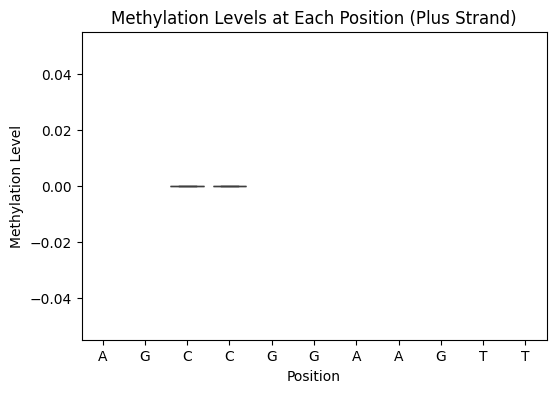

In [13]:
import seaborn as sns

# Lineplot the methylation levels

import matplotlib.pyplot as plt

# Extract methylation levels for the binding site region
df_peaks['methylation_binding_plus'] = df_peaks.apply(lambda row: row['methyl_plus'][row['binding_start']:row['binding_end']], axis=1)
df_peaks['methylation_binding_minus'] = df_peaks.apply(lambda row: row['methylation_minus'][row['binding_start']:row['binding_end']], axis=1)


# Create a DataFrame for the methylation levels at each position
methylation_data = pd.DataFrame(df_peaks['methylation_binding_plus'].tolist()).T
methylation_data.columns = df_peaks.index

# Melt the DataFrame for seaborn
methylation_data = methylation_data.reset_index().melt(id_vars='index', var_name='Peak', value_name='Methylation')
methylation_data.columns = ['Position', 'Peak', 'Methylation']

# Plot the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Position', y='Methylation', data=methylation_data)
plt.title('Methylation Levels at Each Position (Plus Strand)')
plt.xlabel('Position')
plt.ylabel('Methylation Level')

# Change the x labels to the sequence
plt.xticks(ticks=range(len(origin_binding)), labels=list(origin_binding))
plt.show()

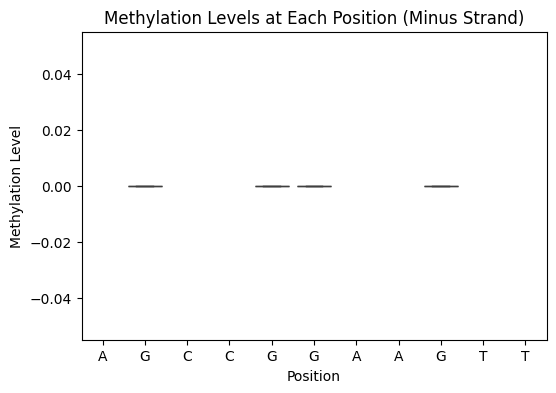

In [14]:
# Create a DataFrame for the methylation levels at each position for the minus strand
methylation_data_minus = pd.DataFrame(df_peaks['methylation_binding_minus'].tolist()).T
methylation_data_minus.columns = df_peaks.index

# Melt the DataFrame for seaborn
methylation_data_minus = methylation_data_minus.reset_index().melt(id_vars='index', var_name='Peak', value_name='Methylation')
methylation_data_minus.columns = ['Position', 'Peak', 'Methylation']

# Plot the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Position', y='Methylation', data=methylation_data_minus)
plt.title('Methylation Levels at Each Position (Minus Strand)')
plt.xlabel('Position')
plt.ylabel('Methylation Level')

# Change the x labels to the sequence
plt.xticks(ticks=range(len(origin_binding)), labels=list(origin_binding))
plt.show()

In [15]:
# Classifiy the peaks according to no-methyl | c-methyl | g-methyl | cg-methyl at postiions 3and4


def classify_peak(row):

    # Get methylation values at positions 3 and 4 (0-indexed)
    val_c = row['methylation_binding_plus'][origin_cpg]
    val_g = row['methylation_binding_minus'][origin_cpg+1]

    # Set threasholds
    threshold_down = 10
    threshold_up = 100 - threshold_down

    # Convert NaN values to zeros
    if pd.isnull(val_c):
        val_c = 0.0
    if pd.isnull(val_g):
        val_g = 0.0
    

    # Check for no methylation (both values are below the lower threshold)
    if val_c < threshold_down and val_g < threshold_down:
        return 'no-methyl'
    
    # Check for cg methylation (both values are above the upper threshold)
    elif val_c > threshold_up and val_g > threshold_up:
        return 'cg-methyl'
    
    # Check for only c methyl: C is high and G is low
    elif val_c > threshold_up and val_g < threshold_down:
        return 'c-methyl'
    
    # Check for only g methyl: G is high and C is low
    elif val_g > threshold_up and val_c < threshold_down:
        return 'g-methyl'
    
    # Default: return no methylation if none of the above criteria are met
    return 'no-methyl'

df_peaks['methylation_class'] = df_peaks.apply(classify_peak, axis=1)

/tmp/ipykernel_1874865/188946342.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peaks['methylation_class'] = df_peaks.apply(classify_peak, axis=1)


In [16]:

df_peaks['methylation_class']

30      no-methyl
353     no-methyl
473     no-methyl
3110    no-methyl
3132    no-methyl
5517    no-methyl
5748    no-methyl
7989    no-methyl
Name: methylation_class, dtype: object

In [17]:
df_peaks

,0,1,2,3,4,5,6,7,8,9,sequence,methyl_plus,methylation_minus,binding_start,binding_end,methylation_binding_plus,methylation_binding_minus,methylation_class
30,chr14,77457480,77458112,.,1000,.,380.92914,-1.0,4.02510,262,TGGGACACCCTCACCTCTTCCGCACAGAGCCCTCCCTCTCAGGACA...,"[nan, nan, nan, nan, nan, 0.0, nan, 0.0, 0.0, ...","[nan, 0.0, 0.0, 0.0, nan, nan, nan, nan, nan, ...",545,556,"[nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, ...","[nan, 0.0, nan, nan, 0.0, 0.0, nan, nan, 0.0, ...",no-methyl
353,chr15,34969629,34969964,.,1000,.,181.23464,-1.0,4.02510,166,CCACTCCAGTGGAAACTAAAGGACCGCTCTGGGCAGCGGCAACCCT...,"[0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, 0.0, ...",187,198,"[nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, ...","[nan, 0.0, nan, nan, 0.0, 0.0, nan, nan, 0.0, ...",no-methyl
473,chr14,77457480,77458112,.,1000,.,157.81796,-1.0,4.02510,462,TGGGACACCCTCACCTCTTCCGCACAGAGCCCTCCCTCTCAGGACA...,"[nan, nan, nan, nan, nan, 0.0, nan, 0.0, 0.0, ...","[nan, 0.0, 0.0, 0.0, nan, nan, nan, nan, nan, ...",545,556,"[nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, ...","[nan, 0.0, nan, nan, 0.0, 0.0, nan, nan, 0.0, ...",no-methyl
3110,chr3,196287547,196288051,.,651,.,52.26339,-1.0,4.02510,252,CAGTCACCTCGCGGTCCCAGCCCCACAGTTTGTCCTCTCAAACAGA...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",188,199,"[nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, ...","[nan, 0.0, nan, nan, 0.0, 0.0, nan, nan, 0.0, ...",no-methyl
3132,chr12,50111719,50112223,.,1000,.,52.00456,-1.0,4.02510,252,AGCCGGGCTCTAGGGGGCGCGCGATCCACCTCCAGAAGGCCGGCTG...,"[nan, nan, 0.0, 0.0, nan, nan, nan, 0.0, nan, ...","[nan, 0.0, nan, nan, 0.0, 0.0, 0.0, nan, nan, ...",255,266,"[nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, ...","[nan, 0.0, nan, nan, 0.0, 0.0, nan, nan, 0.0, ...",no-methyl
5517,chr16,3106233,3106737,.,809,.,34.52442,-1.0,3.59229,252,AGGGGAGTGTGAGGCCGACCCTCGGCCGGGGAGGCTGGACCCGGGC...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, 11.11111068725586, 0.0, 0.0, 12.5, nan, ...",303,314,"[nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, ...","[nan, 0.0, nan, nan, 0.0, 0.0, nan, nan, 0.0, ...",no-methyl
5748,chr20,3209277,3209781,.,821,.,33.51741,-1.0,3.39224,252,GTGGTCTCTTCCGGTTCTTGAAGATAGCGTCCCTTAGGCAGGAGGG...,"[nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, ...","[0.0, nan, 0.0, 0.0, nan, nan, nan, nan, nan, ...",205,216,"[nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, ...","[nan, 0.0, nan, nan, 0.0, 0.0, nan, nan, 0.0, ...",no-methyl
7989,chr12,50111925,50112429,.,722,.,24.55679,-1.0,2.16909,252,CGAGAGCACGGCGCGTCTGAGGATGCGTAGTAAGGATAACGGGCCC...,"[0.0, nan, nan, nan, nan, nan, 0.0, nan, 0.0, ...","[nan, 0.0, nan, 0.0, nan, 0.0, nan, nan, nan, ...",49,60,"[nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, ...","[nan, 0.0, nan, nan, 0.0, 0.0, nan, nan, 0.0, ...",no-methyl


In [18]:
# Save the data
df_peaks.to_csv(f'processed/{origin_cell}_{origin_tf}_{origin_binding}.bed', sep='\t', index=False)

